In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from scipy.spatial.distance import squareform
from scipy.misc import imread

In [2]:
unruled = glob.glob('../Sketches/Unruled/*')
ruled = glob.glob('../Sketches/Ruled/*')

In [3]:
len(unruled)

220

In [4]:
len(ruled)

513

In [50]:
ruled0 = imread(ruled[0], mode = 'L')


/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [51]:
threshold = 180
binarized = 1.0 * (ruled0 > threshold)


In [52]:
binarized


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

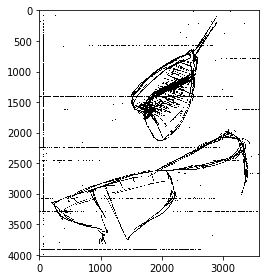

In [53]:
io.imshow(binarized)

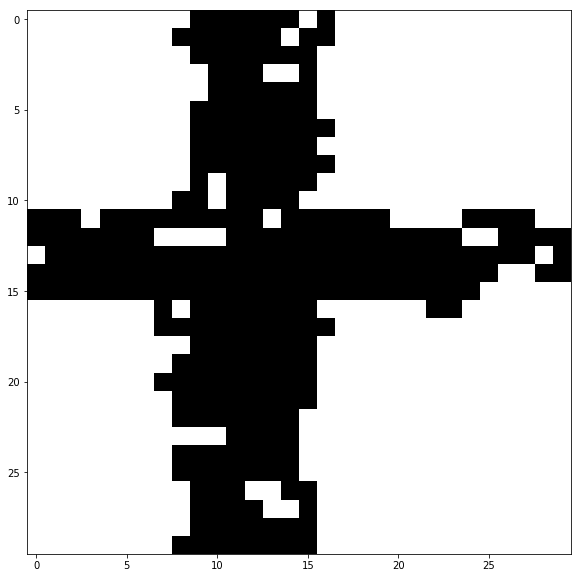

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# for i in range(25):
#     ax[i].imshow(binarized[60:90, 60:90])
ax.imshow(binarized[1400:1430, 60:90], cmap='gray')
#     ax[1].imshow(binarized[90:120, 60:90], cmap='gray')


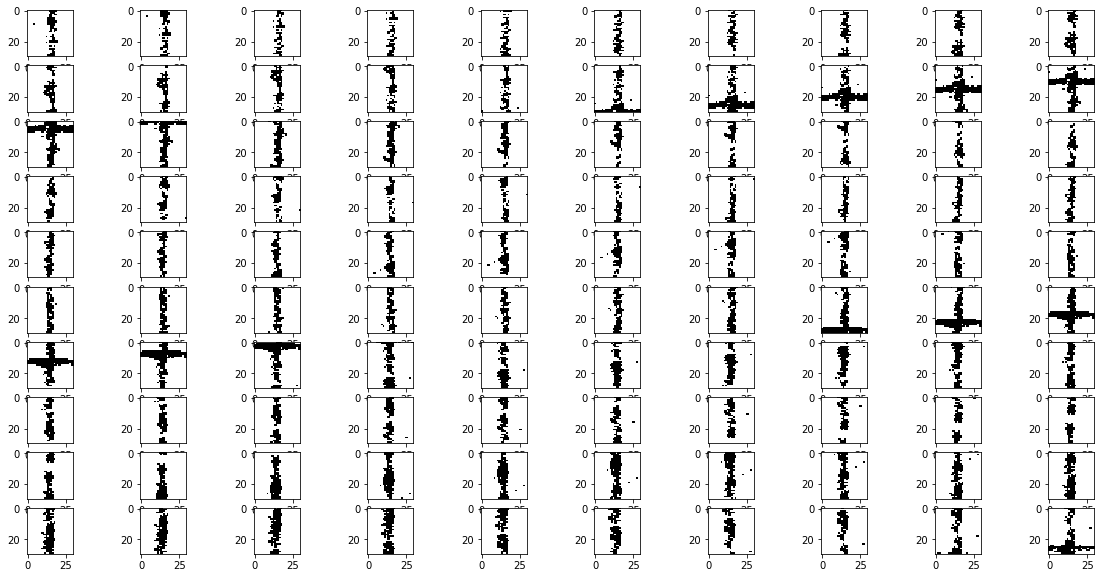

In [48]:
fig, ax = plt.subplots(10, 10, figsize = (20, 10))
ax.flatten()
# for i in range(25):
#     ax[i].imshow(binarized[60:90, 60:90])
for i, a in enumerate(ax.flatten()):
    a.imshow(binarized[60+5*i:90+5*i, 60:90], cmap='gray')
#     ax[1].imshow(binarized[90:120, 60:90], cmap='gray')


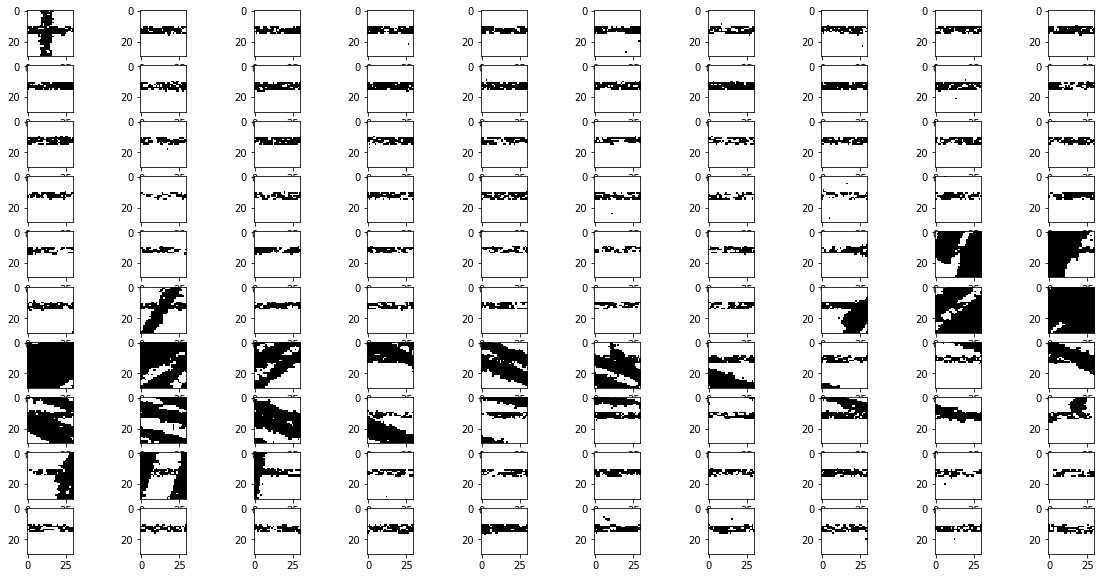

In [59]:
fig, ax = plt.subplots(10, 10, figsize = (20, 10))
ax.flatten()
# for i in range(25):
#     ax[i].imshow(binarized[60:90, 60:90])
for i, a in enumerate(ax.flatten()):
    a.imshow(binarized[1400:1430, 60+30*i:90+30*i], cmap='gray')
#     print(60+10*i, 90+10*i)
#     ax[1].imshow(binarized[90:120, 60:90], cmap='gray')


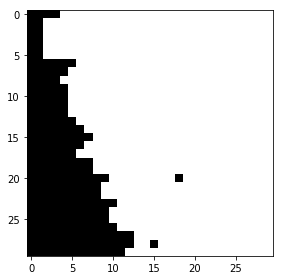

In [58]:
io.imshow(binarized[2000:2030, 1990:2020])

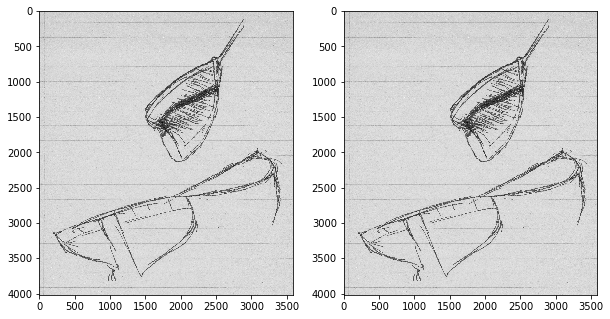

In [63]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(ruled0, cmap='gray')
ax[1].imshow(ruled0, cmap='gray')

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


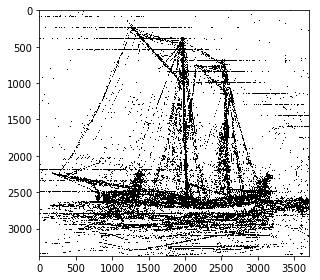

In [17]:
ruled22 = imread(ruled[22], mode = 'L')

threshold = 225
binarized22 = 1.0 * (ruled22 > threshold)

io.imshow(binarized22)



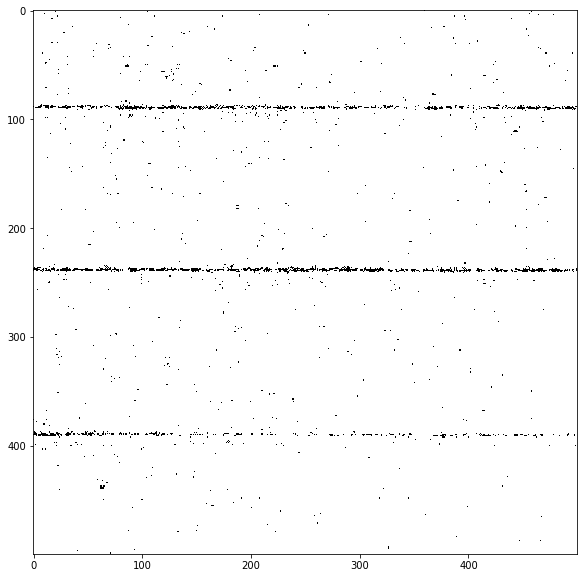

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# for i in range(25):
#     ax[i].imshow(binarized[60:90, 60:90])
ax.imshow(binarized22[0:500, 0:500], cmap='gray')
#     ax[1].imshow(binarized[90:120, 60:90], cmap='gray')


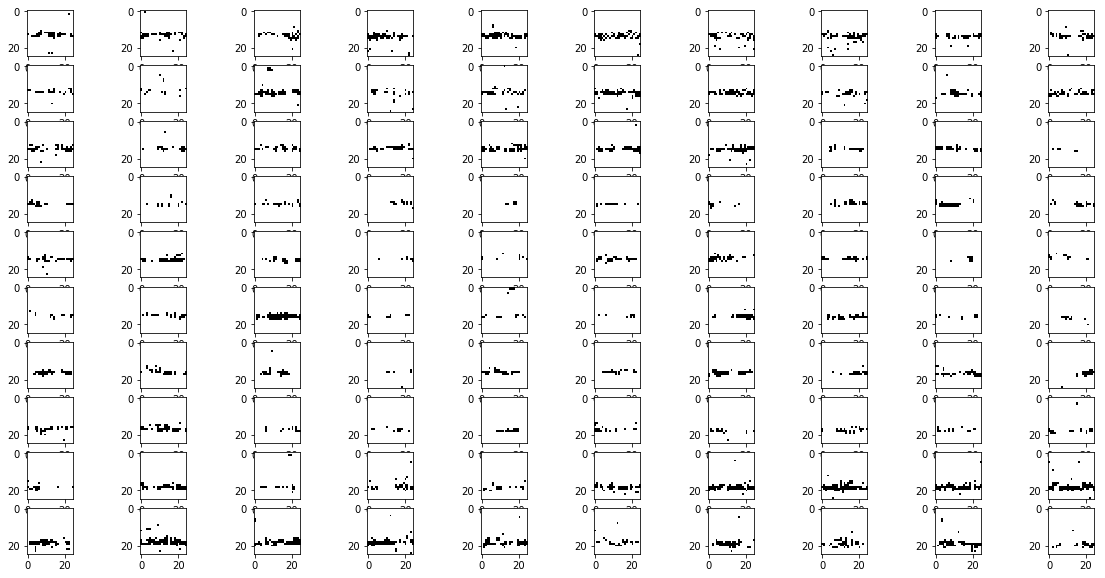

In [22]:
fig, ax = plt.subplots(10, 10, figsize = (20, 10))
ax.flatten()
# for i in range(25):
#     ax[i].imshow(binarized[60:90, 60:90])
for i, a in enumerate(ax.flatten()):
    a.imshow(binarized22[75:100, 0+30*i:25+30*i], cmap='gray')
#     print(60+10*i, 90+10*i)
#     ax[1].imshow(binarized[90:120, 60:90], cmap='gray')


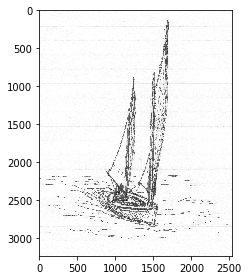

In [82]:
io.imshow(ruled20)

I need to binarize all ruled and unruled images.
I need to find a threshold that shows the lines for all ruled images (??) - talk to Frank about this step. It might not be necesary 

I need to classify zoomed in images of lines and drawings (This is going to be difficult - how much data? how do I standardize the process?)
    - I think I can get images of lines by striding up and down lines in ruled images
    - I think I can get images of drawings by collecting all pixels in unruled images that are not white (binarized images)
    
Once I have classified images of lines and drawings, I can train a CNN on these images.

Lastly, I will stride through ruled images, run my model, classify what is and what isn't a line, and remove the line




In [5]:
def binarize_images(images, threshold, n):
    binarized_images = []
    for i in range(n):
        try:
            image = imread(images[i], mode = 'L')
            binarized = 1.0 * (image > threshold)
            binarized_images.append(binarized)
        except:
            continue
    return np.array(binarized_images)

def greyscale_images(images,  n):
    greyscale_images = []
    for i in range(n):
        try:
            image = imread(images[i], mode = 'L')
            
            greyscale_images.append(image)
        except:
            continue
    return np.array(greyscale_images)
        

In [6]:
images = binarize_images(ruled, 200, 30)
greyscale_images = greyscale_images(ruled, 30)

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


In [7]:
for image in images:
    print(image.shape)

(4017, 3590)
(4542, 4017)
(4821, 3578)
(4174, 2882)
(3237, 3147)
(4241, 3180)
(4092, 5369)
(4324, 2750)
(3343, 2806)
(3776, 2941)
(3876, 3197)
(6544, 5096)
(5392, 3151)
(4804, 4059)
(1640, 3545)
(3078, 1858)
(3074, 2647)
(4006, 4256)
(3232, 2542)
(5910, 3986)
(3375, 3711)
(3618, 2121)
(3273, 2385)
(3363, 4208)
(3642, 4653)
(1772, 2683)
(2186, 5016)


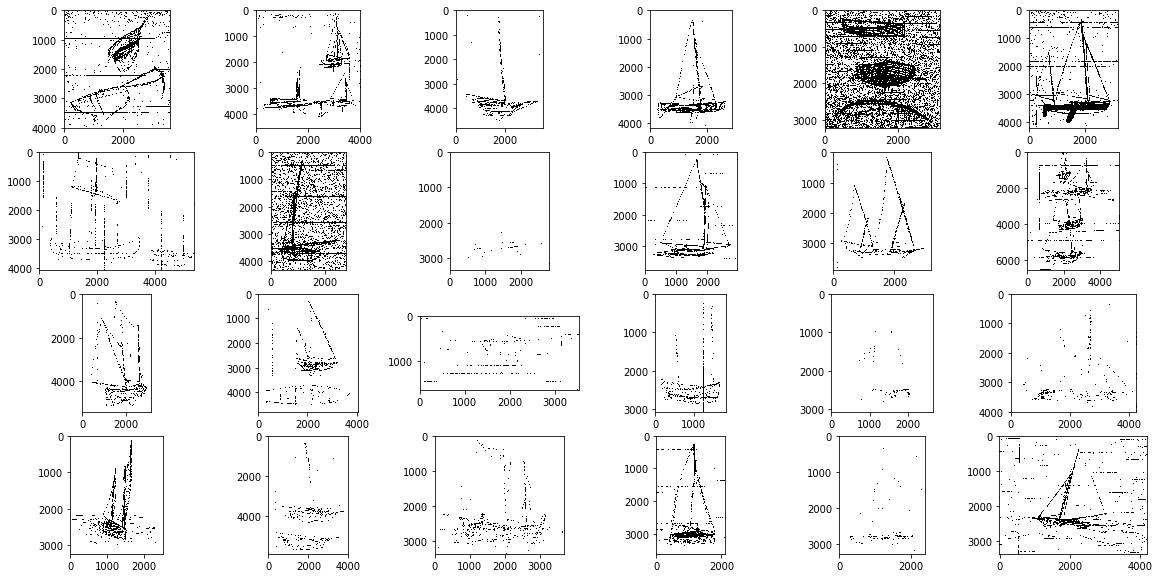

In [55]:
fig, ax = plt.subplots(4, 6, figsize = (20, 10))
for i, a in enumerate(ax.flatten()):
    a.imshow(images[i], cmap='gray')

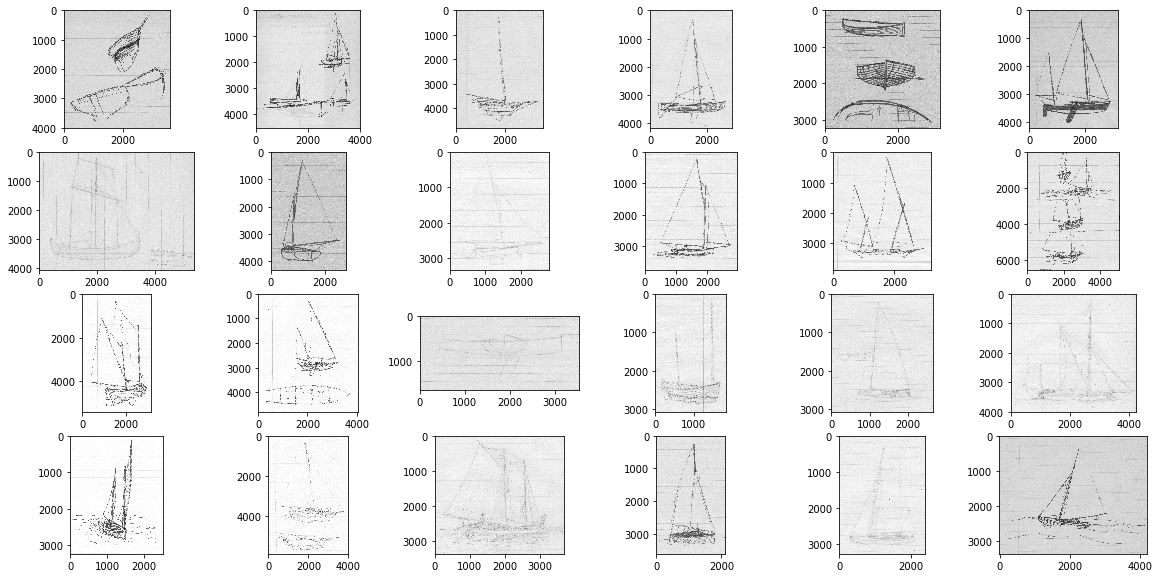

In [63]:
fig, ax = plt.subplots(4, 6, figsize = (20, 10))
for i, a in enumerate(ax.flatten()):
    a.imshow(greyscale_images[i], cmap='gray')


Mean pixel intensities - this will make the threshold
pixel std 
